In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
from scipy.spatial import Voronoi, voronoi_plot_2d
import highlight_text

In [172]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

In [178]:
barca_x=[93,96,99,102,104,95,86,79,89]
barca_y=[9,22,33,44,56,63,52,33,22]
barca = list(np.zeros((9,),dtype=int))

opp_x=[99,100,102,104,104,102,97,98,94,77]
opp_y=[14,22,33,43,46,55,37,27,21,45]
opp = list(np.ones((10,),dtype=int))

df = pd.DataFrame({
    'x':barca_x+opp_x,
    'y':barca_y+opp_y,
    'team':barca+opp
})

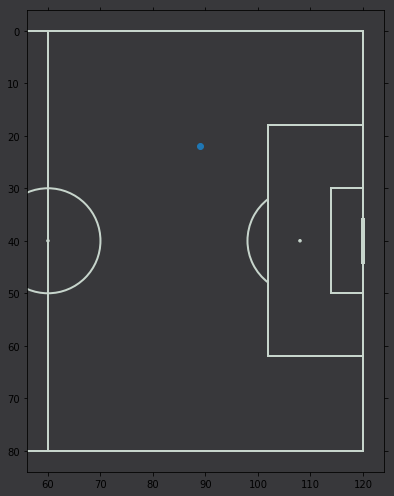

In [179]:
fig, ax = plt.subplots(figsize=(13,8.5))
fig.set_facecolor('#38383b')
ax.patch.set_facecolor('#38383b')

#The statsbomb pitch from mplsoccer
pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color='#38383b', line_color='#c7d5cc', figsize=(13, 8),
              constrained_layout=False, tight_layout=True, view='half',axis=True,label=True,tick=True)

pitch.draw(ax=ax)

pitch.scatter(89,22,ax=ax)

In [180]:
df

,x,y,team
0,93,9,0
1,96,22,0
2,99,33,0
3,102,44,0
4,104,56,0
5,95,63,0
6,86,52,0
7,79,33,0
8,89,22,0
9,99,14,1


In [181]:
points=np.column_stack((df.x,df.y))

[[Text(0.32, 0.9092156862745098, 'Cadiz'),
  Text(0.398258547008547, 0.9092156862745098, ' Low Block vs '),
  Text(0.5793482905982907, 0.9092156862745098, 'Barcelona')]]

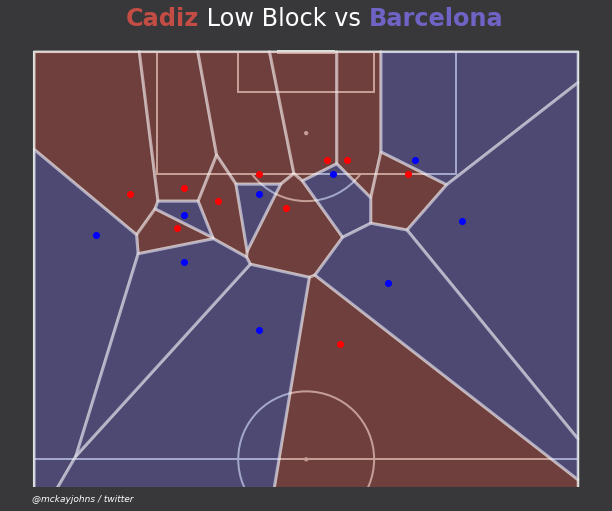

In [205]:
fig, ax = plt.subplots(figsize=(13,8.5))
fig.set_facecolor('#38383b')
ax.patch.set_facecolor('#38383b')

#The statsbomb pitch from mplsoccer
pitch = Pitch(pitch_type='statsbomb', orientation='vertical',
              pitch_color='#38383b', line_color='#c7d5cc', figsize=(13, 8),
              constrained_layout=False, tight_layout=True, view='half')

pitch.draw(ax=ax)

x=df.x
y=df.y
team1,team2 = pitch.voronoi(x,y,df.team)

t1 = pitch.polygon(team1, ax=ax, fc='#c34c45', ec='white', lw=3, alpha=0.4)
t2 = pitch.polygon(team2, ax=ax, fc='#6f63c5', ec='white', lw=3, alpha=0.4)

# Plot players
for i in range(len(df['x'])):
    if df['team'][i]==0:
        pitch.scatter(df['x'][i],df['y'][i],ax=ax,color='blue')
    if df['team'][i]==1:
        pitch.scatter(df['x'][i],df['y'][i],ax=ax,color='red')
        
#plt.title('Messi Goal vs Real Betis',fontfamily='Andale Mono',c='white',fontsize=24,ha='center',va='center')

fig.text(x=.22,y=.1,s='@mckayjohns / twitter',fontstyle='italic',fontsize=9,fontfamily='Andale Mono',color='white')

s='<Cadiz> Low Block vs <Barcelona>'
highlight_text.fig_text(s=s,x=.32, y=.87, 
                        fontfamily='Andale Mono', highlight_weights=['bold'], fontsize=24, color='white', 
                        highlight_colors=['#c34c45','#6f63c5'])


#plt.savefig('voronoi.png',dpi=500,bbox_inches = 'tight',facecolor='#38383b')